In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy.spatial import KDTree

%matplotlib inline

<b style="color:rgb(0, 0, 0); background: #eee" title="rgb(0, 0, 0)">██ black</b>

<b style="color:rgb(80, 167, 232); background: #eee" title="rgb(80, 167, 232)">██ blue</b>

<b style="color:rgb(136, 124, 164); background: #eee" title="rgb(136, 124, 164)">██ purple</b>

<b style="color:rgb(155, 194, 70); background: #eee" title="rgb(155, 194, 70)">██ green</b>

<b style="color:rgb(169, 118, 79); background: #eee" title="rgb(169, 118, 79)">██ brown</b>

<b style="color:rgb(172, 175, 191); background: #eee" title="rgb(172, 175, 191)">██ gray</b>

<b style="color:rgb(230, 63, 56); background: #eee" title="rgb(230, 63, 56)">██ red</b>

<b style="color:rgb(232, 141, 173); background: #eee" title="rgb(232, 141, 173)">██ pink</b>

<b style="color:rgb(242, 178, 43); background: #eee" title="rgb(242, 178, 43)">██ yellow</b>

<b style="color:rgb(254, 252, 254); background: #eee" title="rgb(254, 252, 254)">██ white</b>

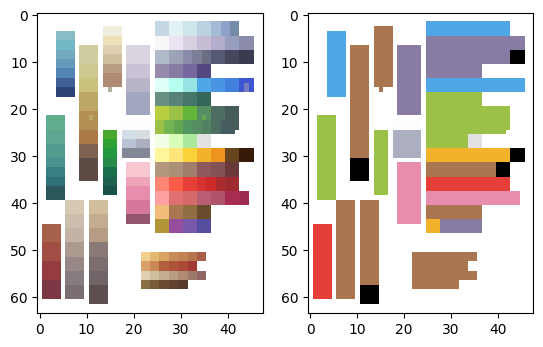

In [2]:
fig, axes = plt.subplots(1, 2)

palette = cv2.imread("dist/modernexteriors-win/Palette.png", cv2.IMREAD_UNCHANGED)
palette = cv2.cvtColor(palette, cv2.COLOR_BGR2RGBA)
axes[0].imshow(palette)

simplified = cv2.imread("palette.png", cv2.IMREAD_UNCHANGED)
simplified = cv2.cvtColor(simplified, cv2.COLOR_BGR2RGBA)
axes[1].imshow(simplified)

flat = simplified.reshape(-1, simplified.shape[2])
rgbs = flat[flat[:,3] == 255][:,:3]
unique_colors = np.unique(rgbs, axis=0)

color_names = {
    (242, 178, 43): "yellow",
    (230, 63, 56): "red",
    (155, 194, 70): "green",
    (169, 118, 79): "brown", 
    (136, 124, 164): "purple",
    (232, 141, 173): "pink", 
    (172, 175, 191): "gray",
    (80, 167, 232): "blue",
    (254, 252, 254): "white",
    (0, 0, 0): "black",
}

for r, g, b in unique_colors:
    css = f"rgb({r}, {g}, {b})"
    name = color_names[r, g, b]
    display(Markdown(f'<b style="color:{css}; background: #eee" title="{css}">██ {name}</b>'))

In [3]:
palette_labels = {}

for x in range(palette.shape[0]):
    for y in range(palette.shape[1]):
        p = tuple(palette[x, y])
        if p[3] == 255:
            s = tuple(simplified[x, y])
            palette_labels[p[:3]] = color_names[s[:3]]
            
with open("dist/palette_labels.json", "w") as f:
    json.dump({str(k): v for k, v in palette_labels.items()}, f)

len(palette_labels)

174

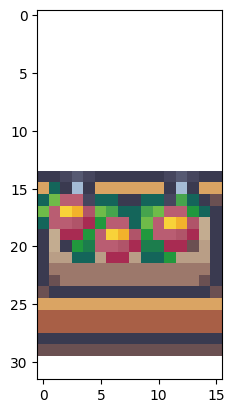

In [4]:
path = (
    "dist/modernexteriors-win/Modern_Exteriors_16x16/"
    "ME_Theme_Sorter_16x16/7_Villas_Singles_16x16/"
#     "ME_Singles_Villas_16x16_Tree_House_1.png"
#     "ME_Singles_Villas_16x16_Picnic_5.png"
    "ME_Singles_Villas_16x16_Hanging_Flowers_4.png"
)
a = cv2.imread(path, cv2.IMREAD_UNCHANGED)
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGBA)
plt.imshow(a)

In [15]:
from collections import Counter

palette_colors = list(palette_labels.keys())
kdt = KDTree(palette_colors)
get_label = lambda x: palette_labels[palette_colors[kdt.query(x)[1]]]

def count_colors(img) -> Counter:
    flat = img.reshape(-1, img.shape[2])
    rgb = flat[flat[:,3] == 255][:,:3]
    colors, counts = np.unique(rgb, axis=0, return_counts=True)
    counter = Counter()
    for color, count in zip(colors, counts):
        label = get_label(tuple(color))
#         display(Markdown(f'<b style="color: rgb{color};" title="{color}">{label} ({count})</b>'))
        match label:
            case "yellow":
                count *= 4 
            case "pink":
                count *= 4
            case "red":
                count *= 3
            case "blue":
                count *= 2
            case other:
                pass
        counter[label] += count
    return counter

In [18]:
c = count_colors(a)
threshold = c.most_common()[0][1] * 0.7
for color, count in c.most_common()[:3]:
    if count < threshold:
        break
    print(color, count)

pink 120
brown 95
